In [1]:
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.", # -> [오늘, 날씨가, 좋아서 ...]
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

In [2]:
from mecab import MeCab

In [3]:
mecab=MeCab()

### 자연어 전처리 

In [12]:

# 불용어 리스트 생성 (예시)
stopwords = ['가', '고', '을', '를', '이', '는']
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 불용어 리스트 생성 (예시)
stopwords = ['가', '고', '을', '를', '이', '는']

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Alpha","Verb","Number"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]
tokenizer 

<function __main__.tokenizer(raw, pos=['Noun', 'Alpha', 'Verb', 'Number'], stopword=['가', '고', '을', '를', '이', '는'])>

In [5]:
# ## 명사만 추출
# morphs_list = list()
# for sentence in sentences :
#     morphs = mecab.nouns(sentence)
#     morphs_list = morphs_list + morphs
# morphs_list

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)

In [8]:
features = vectorizer.fit_transform(sentences) ## gensim의 dictionary 형태와 유사하게 만들어짐. 
features.toarray()

C:\Users\01-15\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0.46015789, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46015789, 0.46015789, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46015789, 0.        , 0.        ,
        0.        , 0.        , 0.39117625, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.51519219, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

In [10]:
vectorizer.get_feature_names_out()

array(['가다', '가족', '갈다', '건강', '계획', '공부', '나들이', '날씨', '놀다', '마음', '만나다',
       '먹다', '미루다', '배우다', '보내다', '세우다', '시간', '싶다', '어디', '언어', '여행',
       '영화', '오늘', '운동', '음식', '읽다', '정말', '좋아지다', '주말', '친구', '하다'],
      dtype=object)

### LDA 모델 적용 using sklearn
- lda_model=LatentDirichletAllocation(n_components=3, random_state=111) ## 인스턴스화 , n_components =3 토픽 개수 

In [ ]:
## sklearn의 Lda_model from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda_model=LatentDirichletAllocation(n_components=3, random_state=111) ## 인스턴스화 

In [ ]:
lda_model.fit(features) # 학습화 시킴. 

In [ ]:
lda_model.components_ # 토픽에 대한 중요도를 수치화

In [ ]:
len(lda_model.components_[0])

In [ ]:
topics_list = lda_model.components_[0]

### 토픽별 단어 표시
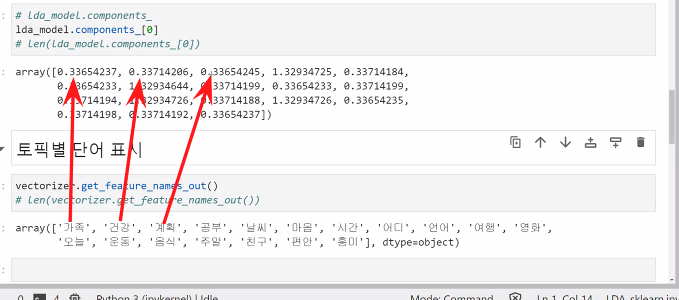

In [ ]:
dictionary_list=vectorizer.get_feature_names_out() # vectorizer에 fit한 글자. len(lda_model.components_[0]) = len(vectorizer.get_feature_names_out())

In [ ]:
import pandas as pd

In [ ]:
# df_datas = [topics_list, dictionary_list] # 2차원 계열로 넣는다. 
# df_topics = pd.DataFrame(df_datas)

In [ ]:
# df_topics=df_topics.T # 행렬의 기능: 대각선을 기준으로 뒤집는 기능
# df_topics

In [ ]:
# df_topics.columns

In [ ]:
# ## 
# df_topics.sort_values(0, ascending=False)

#### quest _ topic 2의 단어 중요도 

In [ ]:
second_list=lda_model.components_[1]

In [ ]:
df_datas_two = [second_list, dictionary_list]


In [ ]:
df_topics_two = pd.DataFrame(df_datas_two)
df_topics_two=df_topics_two.T

In [ ]:
df_topics_two.sort_values(0, ascending=False)

### 댓글과 주요 토픽 연결 (중요도 check)

In [ ]:
### 1. 상위 단어 추출 _ 배열식으로 되어있음. lda_model.components_의 order by 필요 이걸 for문으로 돌려서 뽑아낸다. 
topics_list=list()
for topic in lda_model.components_ :
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(df_datas)
    df_topics = df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False) # 0 : column임. 
    # print(df_topics[:3])
    ### 2. topic에 해당하는 단어들을 떼서 looping돌면서 가져오기 
    ### 1번 column으로 가져오기
    topics_text = ' '.join(df_topics[1].values[:4]) # Series로 가져오기. 
    # keyword들을 더 많이 뽑고싶다면 .values[:word]원하는만큼
    print(topics_text)
    topics_list.append(topics_text)

In [ ]:
topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2']]
df_topic_keyword = pd.DataFrame(topics_list_add)
df_topic_keyword.T

In [ ]:
# df_topics[1].values # 위에서 df_topic을 sort_values하여 descending으로 해서 확률이 높은 순으로 단어를 가져올수있음

In [ ]:
# ' '.join(df_topics[1].values[:4]) # series를 하나의 문장으로 생성

In [ ]:
topics_output=lda_model.transform(features) 

In [ ]:
topics_output 

-첫번째 줄 document에서 2번째 토픽의 주제가 강한편이다 라는걸 추측할수있음. 

### 각 댓글별 topic 분류

In [ ]:
lda_model.n_components

In [ ]:
import numpy as np

In [ ]:
## topics_output을 dataframe에 담고나서 argmax를 할거
df_topics_score = pd.DataFrame(topics_output) # 각 댓글 당 토픽 분류 점수 

In [ ]:
# 각 댓글마다 토픽 분류 지정
dominant_in_topic = np.argmax(topics_output, axis=1)

In [ ]:
df_topics_score['dominant_topic'] = dominant_in_topic
df_topics_score

In [ ]:
type(sentences)

In [ ]:
len(sentences), len(df_topics_score)

In [ ]:
df_topics_score['sentences']=sentences
df_topics_score